# Example of K-Means Clustering (Undergraduate Population vs Rank)

A walkthrough of how to use k-means clustering on datasets with two variables.


1.   Read in files
2.   Determine how many clusters are needed
3.   Apply k-means clustering
4.   Visualize clustered dataset

In [ ]:
# Read in dataset file
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

import pandas as pd
with open('ForbesAmericasTopColleges2019.csv', newline='') as data:
    forbesraw = pd.read_csv(data)

#type(forbesraw)

In [ ]:
# Get dataset information
#print(forbesraw)
#print(forbesraw.describe())
print(forbesraw.columns)

Index(['Rank', 'Name', 'City', 'State', 'Public/Private',
       'Undergraduate Population', 'Student Population', 'Net Price',
       'Average Grant Aid', 'Total Annual Cost', 'Alumni Salary',
       'Acceptance Rate', 'SAT Lower', 'SAT Upper', 'ACT Lower', 'ACT Upper',
       'Website'],
      dtype='object')


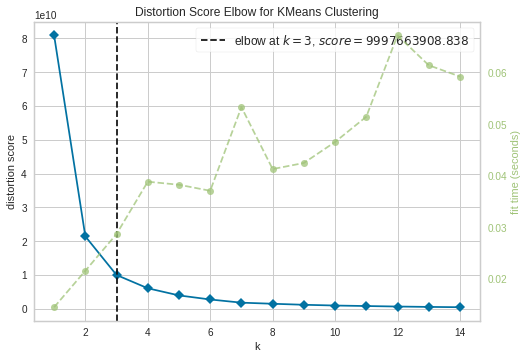

Calculated Clusters: 3


In [ ]:
# Determine how many clusters needed for dataset
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15)).fit(forbesraw[["Undergraduate Population", "Rank"]])
visualizer.show()
print("Calculated Clusters:", visualizer.elbow_value_)

In [ ]:
# Apply k-means clustering to dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(forbesraw[["Undergraduate Population", "Rank"]])

In [ ]:
# Clustering information
#kmeans.labels_ # cluster label for each data point
#kmeans.inertia_ # total within-cluster sum of squares for all clusters
#kmeans.n_iter_ # number of iterations for kmeans to get minimum within-cluster sum of squares
#kmeans.cluster_centers_ # locations of centroids

In [ ]:
# Get cluster sizes
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 435, 1: 73, 2: 142})

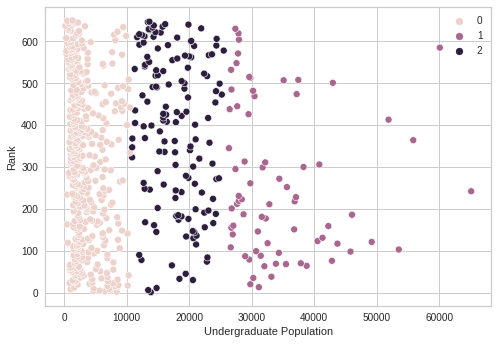

In [ ]:
# K-means clustering plot
import seaborn as sns
sns.scatterplot(data=forbesraw[["Undergraduate Population", "Rank"]], x="Undergraduate Population", y="Rank", hue=kmeans.labels_)
plt.show()

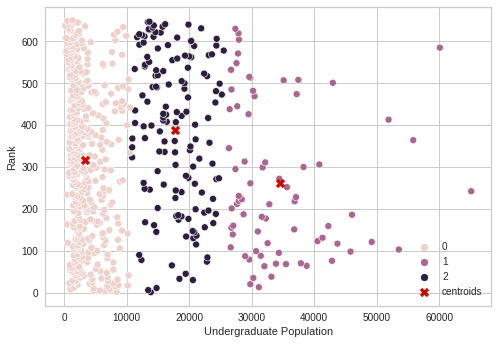

In [ ]:
# K-means clustering plot with centroids
sns.scatterplot(data=forbesraw[["Undergraduate Population", "Rank"]], x="Undergraduate Population", y="Rank", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

# Create K-Means Clustering Functions

Using the above code to create functions to more efficiently use k-means clustering.

In [1]:
def GetClusterNum(df):
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(1,15)).fit(df)
  return(visualizer.elbow_value_)

In [2]:
def PlotKMeans(num_c, df, xlab, ylab):
  # Apply k-means clustering to dataset
  kmeans = KMeans(n_clusters=num_c, init='k-means++', random_state=0).fit(df)

  # K-means clustering plot with centroids
  sns.scatterplot(data=df, x=xlab, y=ylab, hue=kmeans.labels_)
  plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
  plt.legend()
  plt.show()

# Using K-Means Clustering on a Dataset with Multiple Variables

Using the above code to iterate through different variables of interest in a dataset.

Variables of interest:

*   Undergraduate Population
*   Student Population
*   Net Price
*   Average Grant Aid
*   Total Annual Cost
*   Alumni Salary
*   Acceptance Rate
*   SAT Lower
*   SAT Upper
*   ACT Lower
*   ACT Upper



In [23]:
# Import needed packages and read in dataset file
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import pandas as pd

with open('ForbesAmericasTopColleges2019.csv', newline='') as data:
    forbesraw = pd.read_csv(data)

colnames = list(forbesraw.columns) # get list of column names
deletenames = ["Name", "City", "State", "Public/Private", "Website"] # create list of variables not of interest, columns to delete

for name in deletenames:
  colnames.remove(name)
#print(colnames)

In [24]:
#np.logical_not(np.isnan(dataset))
list(map(tuple, np.where(np.isnan(dataset))))

[(194, 380), (0, 0)]

In [8]:
dataset_na = dataset[np.logical_not(np.isnan(dataset))]
print(dataset_na)

     Net Price   Rank
0      14327.0    1.0
1      13261.0    2.0
2      18627.0    3.0
3      20771.0    4.0
4       9327.0    5.0
..         ...    ...
645     8625.0  646.0
646    13012.0  647.0
647    19340.0  648.0
648    22828.0  649.0
649    19807.0  650.0

[650 rows x 2 columns]


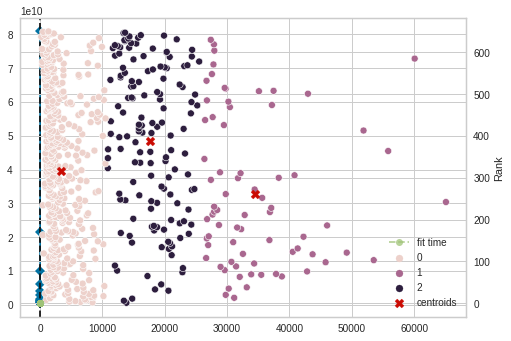

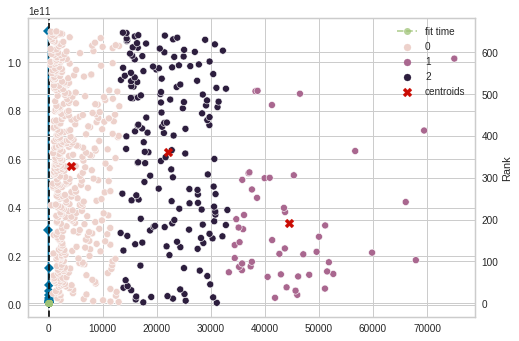

ValueError: ignored

In [4]:
# Loop through all variables of interest
for name in colnames:
  if name == "Rank":
    continue
  else:
    dataset = forbesraw[[name, "Rank"]]
    dataset = dataset[np.logical_not(np.isnan(dataset))]
    num_clust = GetClusterNum(dataset)
    PlotKMeans(num_clust, dataset, name, "Rank")